# Maximum Likelihood vs Maximum A-posteriori

In this notebook, we compare estimating the weights ${\bf w}$ of a linear regression via ML and MAP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.linalg import inv

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
np.set_printoptions(precision=5, suppress=True)

### Creating the synthetic data

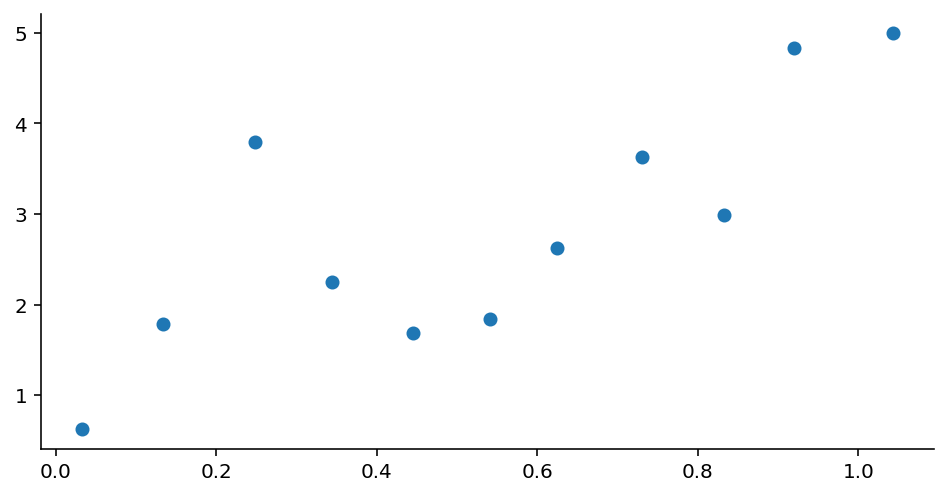

In [2]:
seed(31415)
N, M = 11, 11
α = 1.3
x = np.linspace(0, 1, N) + np.random.rand(N) * 0.05
t = 3 * x + 1.2 + np.random.randn(N) / α
Phi = np.stack([x ** m for m in range(M)], axis=-1)

plt.scatter(x, t)

### ML vs MAP for $N=M$

In [3]:
w_map = inv(α * np.eye(M) + Phi.T @ Phi) @ Phi.T @ t[:, None]
w_map

array([[1.51818],
       [0.89289],
       [0.55671],
       [0.42146],
       [0.34058],
       [0.27683],
       [0.22157],
       [0.17245],
       [0.12832],
       [0.08826],
       [0.05149]])

In [4]:
w_ml = inv(Phi.T @ Phi) @ Phi.T @ t[:, None]
w_ml

array([[      15.82421],
       [    -748.33972],
       [   11341.91667],
       [  -79628.01709],
       [  313876.25215],
       [ -754581.09779],
       [ 1135828.10449],
       [-1053178.02315],
       [  561536.39252],
       [ -143877.66896],
       [    9425.1283 ]])

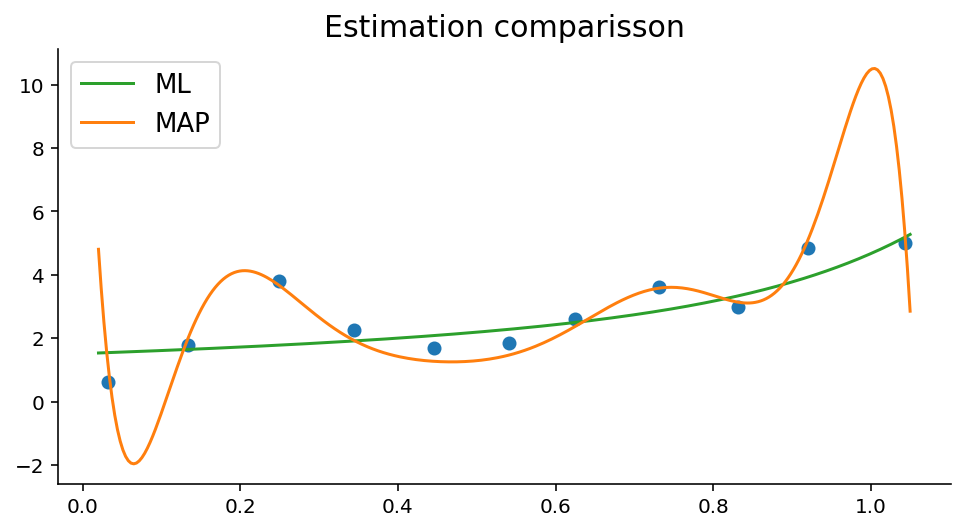

In [5]:
N_test = 300
x_test = np.linspace(0.02, 1.05, N_test)
Phi_test = np.stack([x_test ** m for m in range(M)], axis=-1)

t_map = np.ravel(Phi_test @ w_map)
t_ml = np.ravel(Phi_test @ w_ml)
plt.plot(x_test, t_map, label="ML", c="tab:green")
plt.plot(x_test, t_ml, label="MAP", c="tab:orange")
plt.scatter(x, t, c="tab:blue")
plt.title("Estimation comparisson", fontsize=15)
plt.legend(fontsize=13);

### ${\bf w}_\text{MAP}$ for different $\alpha$ values

The bigger $\alpha$ is with respect to the true $\alpha$, the more overfitting over the data; the smaller $\alpha$ with respect to the true $\alpha$, the more the estimation tends to zero.|

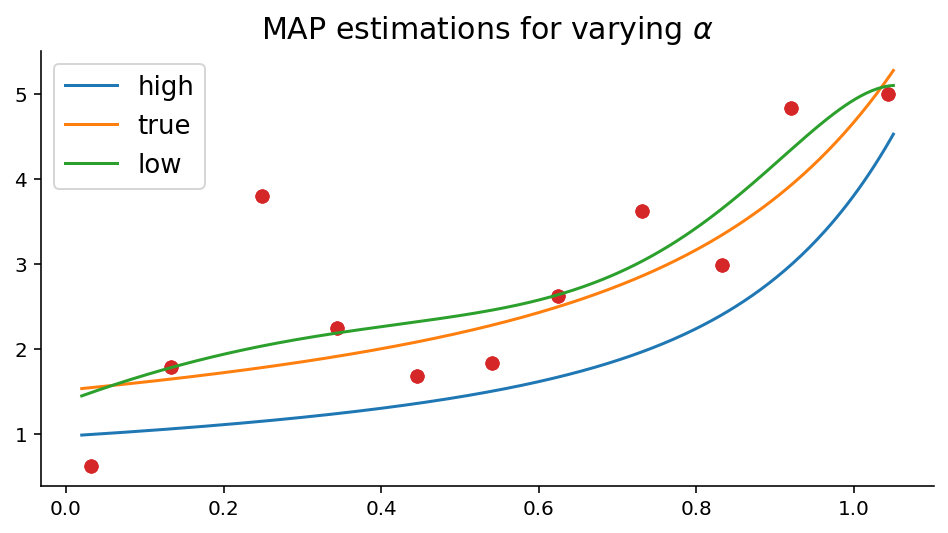

In [6]:
α_low = 0.01
α_high = 10.5

w_map = inv(α * np.eye(M) + Phi.T @ Phi) @ Phi.T @ t[:, None]
w_map_high = inv(α_high * np.eye(M) + Phi.T @ Phi) @ Phi.T @ t[:, None]
w_map_low = inv(α_low * np.eye(M) + Phi.T @ Phi) @ Phi.T @ t[:, None]
w_list = [w_map_high, w_map, w_map_low]
labels = ["high", "true", "low"]
for w, label in zip(w_list, labels):
    t_map = np.ravel(Phi_test @ w)
    plt.plot(x_test, t_map, label=label)
    plt.scatter(x, t, c="tab:red")
plt.legend(fontsize=13)
plt.title(r"MAP estimations for varying $\alpha$", fontsize=15);

### How many datapoints to make ${\bf w}_{ML}$ well defined?

In [7]:
seed(31415)
N, M = 5, 11
α = 1.3
x = np.linspace(0, 1, N) + np.random.rand(N) * 0.05
t = 3 * x + 1.2 + np.random.randn(N) / α
Phi = np.stack([x ** m for m in range(M)], axis=-1)

In [8]:
np.linalg.det(Phi.T @ Phi)

8.498237832069581e-99

In [9]:
np.linalg.matrix_rank(Phi.T @ Phi)

5

In [10]:
np.linalg.eigvals(Phi.T @ Phi)

array([20.14664,  3.49872,  0.38394,  0.02347,  0.00075,  0.     ,
        0.     , -0.     , -0.     , -0.     , -0.     ])

In [11]:
w_ml = inv(Phi.T @ Phi) @ Phi.T @ t[:, None]
w_ml

array([[  -3.75245],
       [  50.28626],
       [ -76.03392],
       [   6.38939],
       [  74.47909],
       [-100.96844],
       [  52.05653],
       [ -13.17761],
       [  12.67011],
       [ -13.51816],
       [   7.83947]])